# COMP5318 Assignment 2
*Make sure you change the file name with your unikey*


# 1. Data set up


## 1.1 Load Data

*Please upload both datasets (any file format is ok) to your google drive, and load the datasets through google drive file id in your code. If you want to use Jupyter, please submit all the dataset in an additional zip file.*



In [1]:
import os
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;
import numpy as np
from numpy import asarray
import pandas as pd
from sklearn import decomposition

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# Download file from google drive
# https://drive.google.com/open?id=1nel9Rn9k7x3tZeG1a9n5MoErVhhvT65_
download = drive.CreateFile({'id':'1nel9Rn9k7x3tZeG1a9n5MoErVhhvT65_'})
download.GetContentFile('dataset1.csv')

# Download file from google drive
# https://drive.google.com/open?id=1_UllIFpawVfZ8PU4HGMWOmUevUhBMPqp
download = drive.CreateFile({'id':'1_UllIFpawVfZ8PU4HGMWOmUevUhBMPqp'})
download.GetContentFile('dataset2.csv')
# read dataset
dataset1 = pd.read_csv('dataset1.csv')
dataset2 = pd.read_csv('dataset2.csv')

## 1.2 Data Preprocessing (optional)

***You are required to show your data preprocessing methods for the two datasets (if necessary)***

*You can apply different data preprocessing techniques in different data and clustering models if you need.*


### Travel Review Dataset

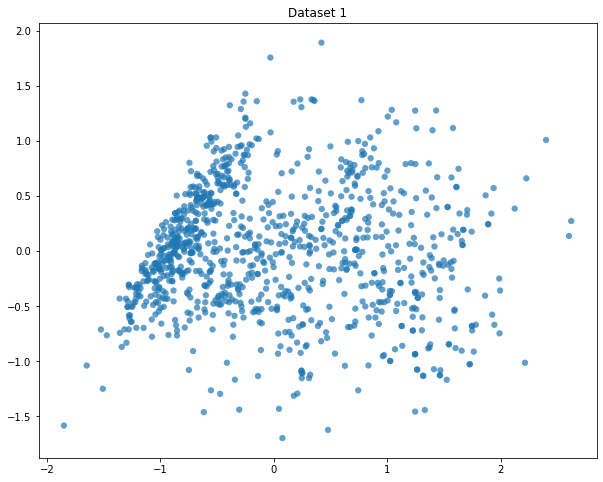

In [3]:
id = np.array(dataset1.iloc[:, 0])
data1 = np.array(dataset1.iloc[:,1:])
# use pca to transfer data to two dimensions
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(data1)
plt.figure(figsize=(10,8))
plt.title('Dataset 1')
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

### ICMLA Datasets

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


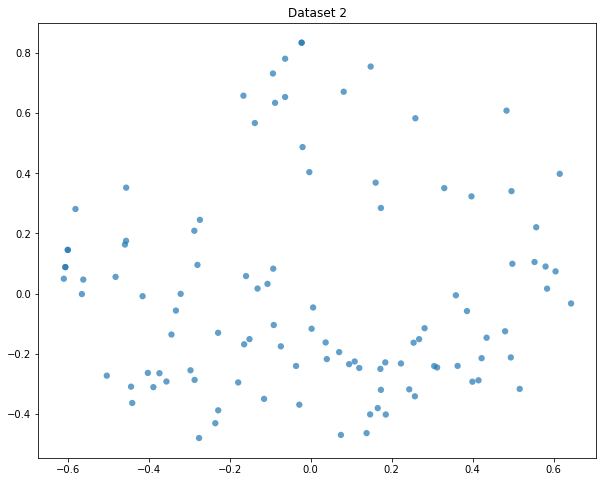

In [4]:
# Please comment your code
import nltk
from nltk.stem.snowball import SnowballStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
# euclidean_distances, manhattan_distances, cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import cosine_similarity

dataset2['feature'] = dataset2['author_keywords']+' '+dataset2['abstract']+'!'
data2 = np.array(dataset2.iloc[:, -1])
label = np.array(dataset2.iloc[:,4])

def into_number(label):
    index = 0
    result = [0]
    for i in range(1, len(label)):
        if label[i] == label[i-1]:
            result.append(index)
        else:
            index += 1
            result.append(index)
    return result

labelSession = into_number(np.array(dataset2['session']))

list1 = []
for i in range(data2.shape[0]):
    temp = data2[i].split('!')
    temp = temp[:-1]
    list1=list1+temp

stemmer = SnowballStemmer("english")
nltk.download('punkt')
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

### TfidfVectorizer will perform the vectorisation. Please explore the parameters at the user guide
tfidf_vectorizer = TfidfVectorizer(max_df=0.6, max_features=200000,
                                 min_df=0.4, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,4))

tfidf_matrix = tfidf_vectorizer.fit_transform(list1)
tfidf_matrix=tfidf_matrix.toarray()

pca = decomposition.PCA(n_components=2)
tfidf_matrix = pca.fit_transform(tfidf_matrix)
dist = 1 - euclidean_distances(tfidf_matrix)
plt.figure(figsize=(10,8))
plt.title('Dataset 2')
plt.scatter(tfidf_matrix[:, 0], tfidf_matrix[:, 1], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))




---


# 2. K-means Clustering

## 2.1 Travel Review Dataset

### Train K-means clustering

In [0]:
from sklearn.cluster import KMeans
k=5
# use k-means to set up k value
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_reduced)
y_kmeans = kmeans.predict(X_reduced)

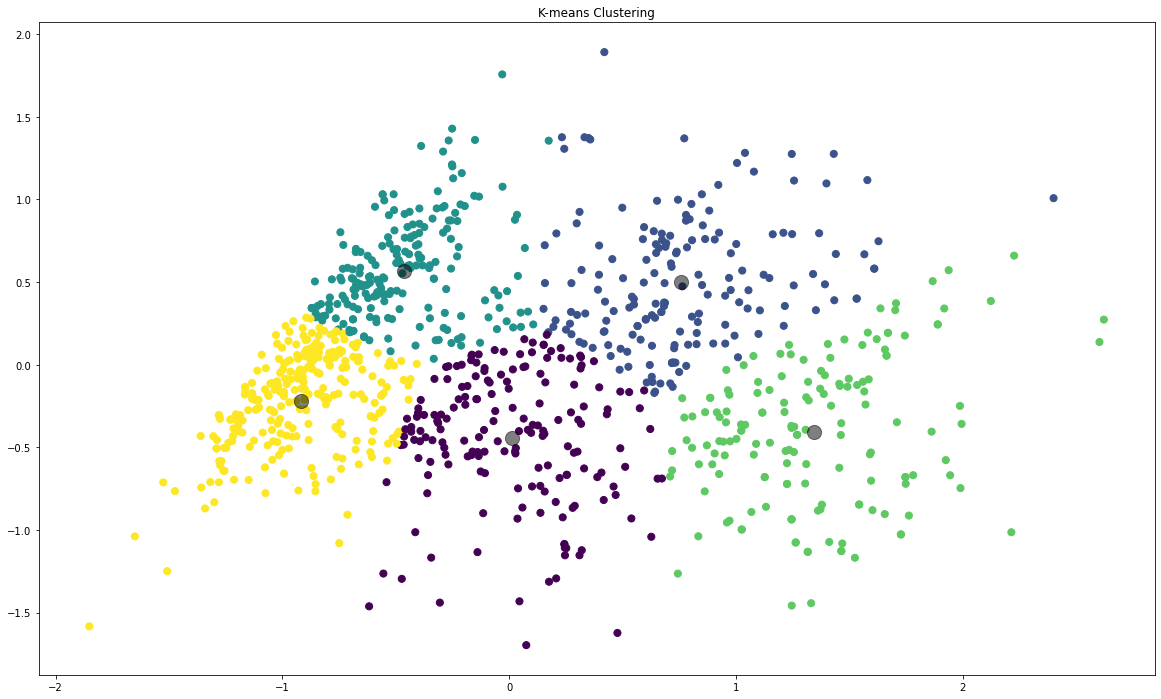

In [6]:
plt.figure(figsize=(20,12))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title('K-means Clustering')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

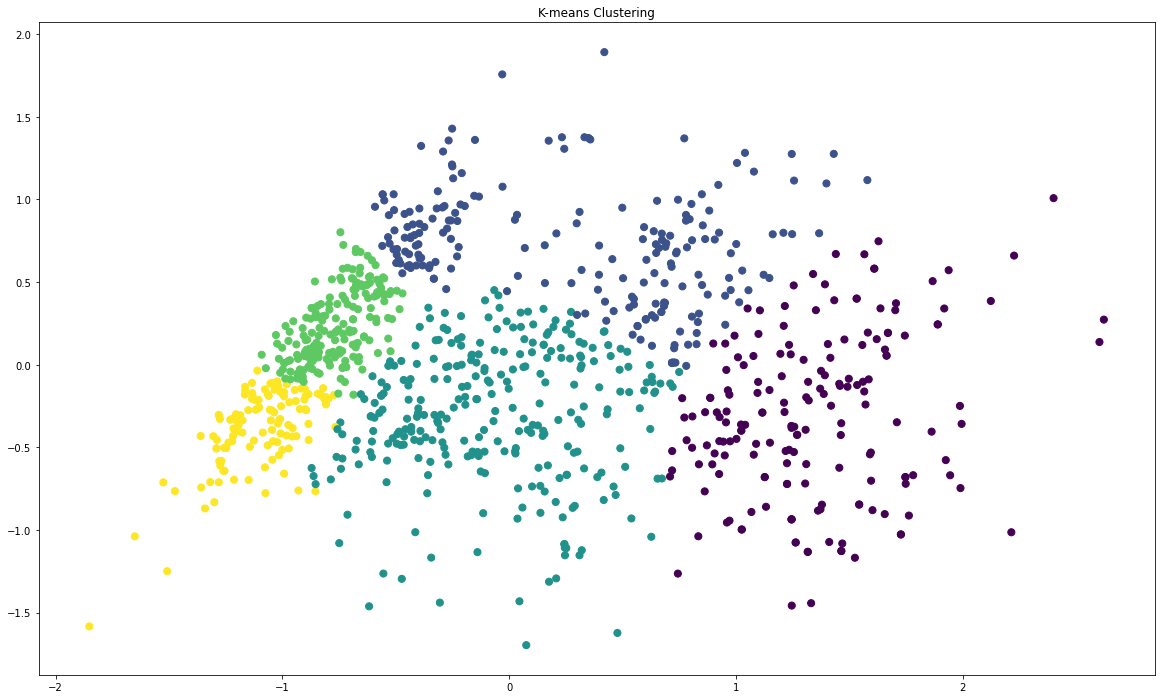

In [7]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=5, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X_reduced)
plt.figure(figsize=(20,12))
plt.title('K-means Clustering')
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels,
            s=50, cmap='viridis');

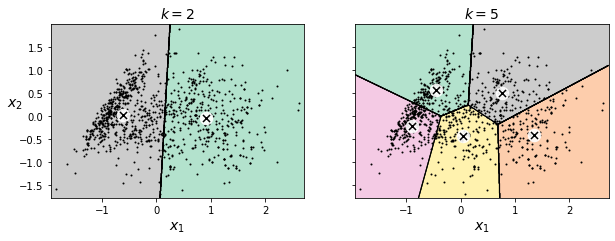

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)
    plt.figure(figsize=(10, 3.2))
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)


kmeans_k3 = KMeans(n_clusters=2, random_state=42)
kmeans_k8 = KMeans(n_clusters=5, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X_reduced, "$k=2$", "$k=5$")
plt.show()

### First evaluation 

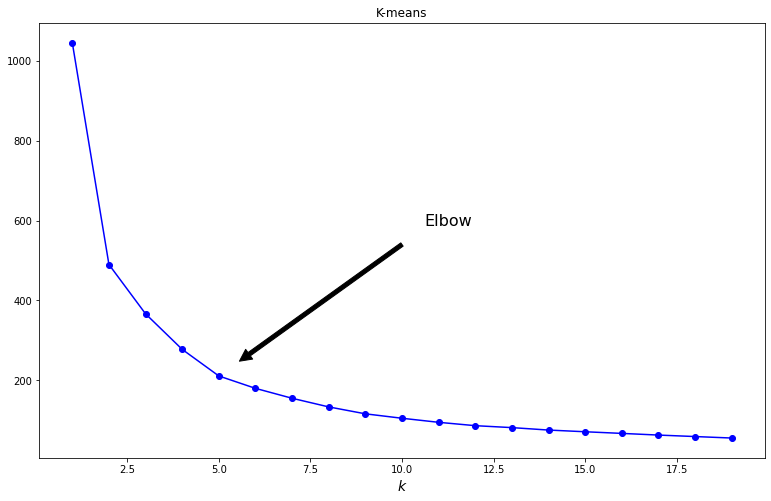

In [9]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_reduced)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(13, 8))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.title("K-means")
plt.annotate('Elbow',
             xy=(5, inertias[4]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

### Second evaluation 

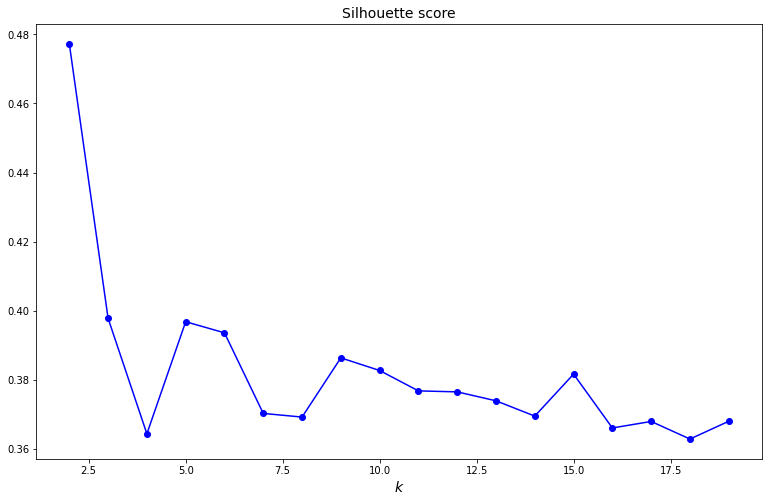

In [10]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X_reduced, model.labels_)
                     for model in kmeans_per_k[1:]]    
plt.figure(figsize=(13, 8))
plt.plot(range(2, 20), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.title("Silhouette score", fontsize=14)
plt.show()

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

## 2.2 ICMLA Dataset

### Train K-means clustering

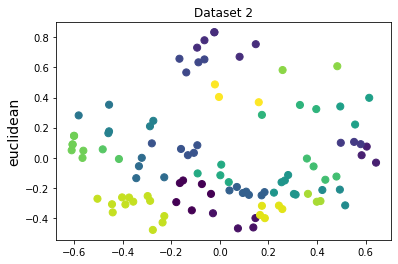

In [11]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters,metrics, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        # metric can be  'cosine', 'euclidean', 'manhattan'
        labels = pairwise_distances_argmin(X, centers, metric=metrics)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(tfidf_matrix, 24,metrics='euclidean')
plt.title("Dataset 2")
plt.ylabel("euclidean", fontsize=14)
plt.scatter(tfidf_matrix[:, 0], tfidf_matrix[:, 1], c=labels,
            s=50, cmap='viridis');

https://scikit-learn.org/stable/modules/clustering.html#k-means

### First evaluation

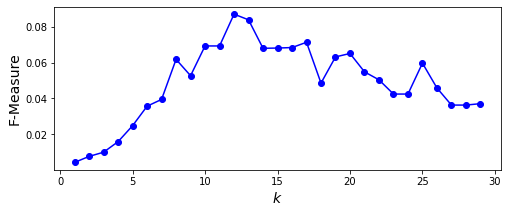

In [12]:
from sklearn.metrics import f1_score

kmeans_per_k
f1_score(labelSession,labels,average='micro')
# average string, [None, ‘binary’ (default), ‘micro’, ‘macro’, ‘samples’, ‘weighted’]

k=30
labelList=[]
for i in range(1,k):
  centers, labels = find_clusters(tfidf_matrix, i,"manhattan")
  # Calculate metrics for each label, and find their average weighted by support 
  # (the number of true instances for each label). This alters ‘macro’ to account 
  # for label imbalance; it can result in an F-score that is not between precision and recall.
  # average string, [None, ‘binary’ (default), ‘micro’, ‘macro’, ‘samples’, ‘weighted’]
  labelList.append(f1_score(labelSession,labels,average='weighted'))          
plt.figure(figsize=(8, 3))
plt.plot(range(1, 30), labelList, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("F-Measure", fontsize=14)
plt.show()




referance: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

### Second evaluation 

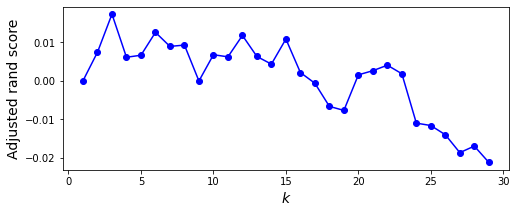

In [13]:
from sklearn import metrics
k=30
labelList=[]
for i in range(1,k):
  centers, labels = find_clusters(tfidf_matrix, i,"manhattan")
  labelList.append(metrics.adjusted_rand_score(labelSession,labels))                     
plt.figure(figsize=(8, 3))
plt.plot(range(1, 30), labelList, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Adjusted rand score", fontsize=14)
plt.show()

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation



---


# 3. Hierachical Clustering

## 3.1 Travel Review Dataset

### Train Hierarchical clustering 

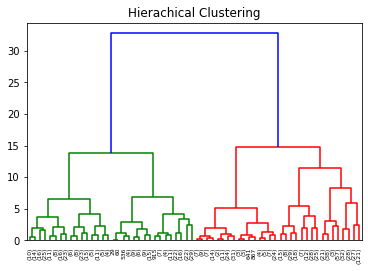

In [14]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def get_labels(k):
  clustering = AgglomerativeClustering(n_clusters=k,linkage='ward').fit_predict(X_reduced)
  return clustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
# linkage{“ward”, “complete”, “average”, “single”}, default=”ward”

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='ward')
model=model.fit(X_reduced)
plt.title('Hierachical Clustering')
plot_dendrogram(model, truncate_mode='level', p=5)


https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

### First evaluation 

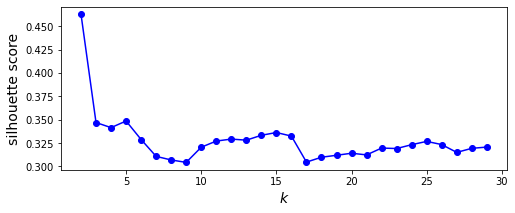

In [15]:
k=30
labelList=[]
for i in range(2,k):
  labelList.append(silhouette_score(X_reduced, get_labels(i)))            
plt.figure(figsize=(8, 3))
plt.plot(range(2, 30), labelList, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("silhouette score", fontsize=14)
plt.show()


https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

### Second evaluation 

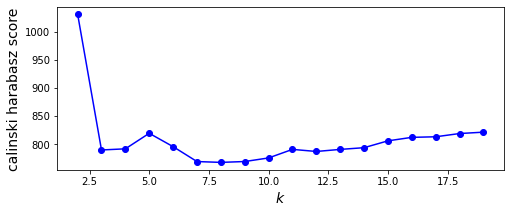

In [16]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
k=20
labelList=[]
for i in range(2,k):
  labelList.append(metrics.calinski_harabasz_score(X_reduced, get_labels(i)))            
plt.figure(figsize=(8, 3))
plt.plot(range(2, 20), labelList, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("calinski harabasz score", fontsize=14)
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html

## 3.2 ICMLA Dataset

### Train Hierarchical clustering 

0.6022860406442214


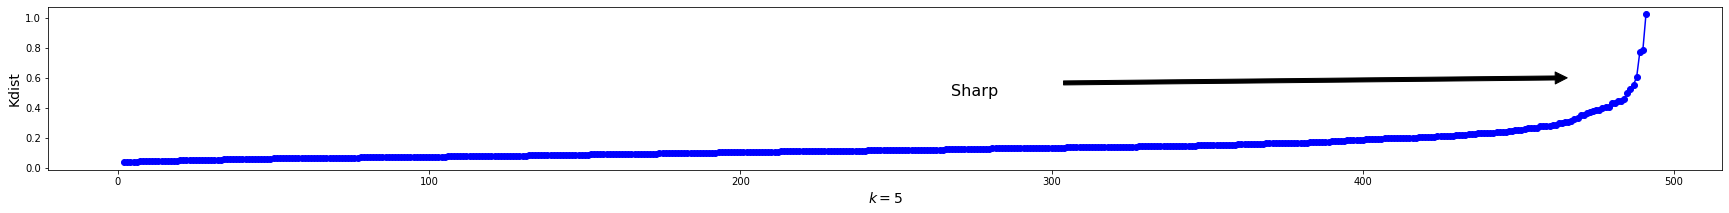

In [17]:
def calculate_eps(data, K):
    # 980*980
    dist = np.zeros((int(len(data)/2), len(data)))
    for i in range(int(len(data)/2)):
        for j in range(len(data)):
            dist[i][j] = np.sqrt(np.power(data[i][0]-data[j][0], 2)+np.power(data[i][1]-data[j][1], 2))
    dist.sort()
    result = dist[:, K]
    result.sort()

    return result.tolist()

def find_sharp(data):
    maxd = 0.05
    for i in range(1, len(data)):
        d = data[i] - data[i-1]
        if d > maxd:
            maxd = d
            return i-1, data[i-1]

kdist = calculate_eps(X_reduced, 8)
x, eps = find_sharp(kdist)
print(eps)
plt.figure(figsize=(30, 3))
plt.plot(range(2, 492), kdist, "bo-")
plt.xlabel("$k=%s$"%5, fontsize=14)
plt.ylabel("Kdist", fontsize=14)
plt.annotate('Sharp',
             xy=(x,eps),
             xytext=(0.55,0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
# plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

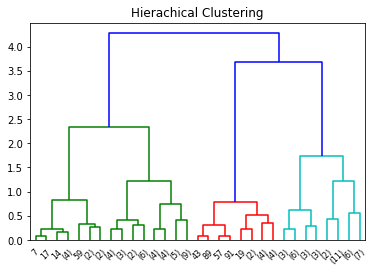

In [18]:
from sklearn.cluster import AgglomerativeClustering
def get_labels(k):
  clustering = AgglomerativeClustering(n_clusters=k,metric='manhattan').fit_predict(tfidf_matrix)
  return clustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model=model.fit(tfidf_matrix)
plt.title('Hierachical Clustering')
plot_dendrogram(model, truncate_mode='level', p=4)


### First evaluation

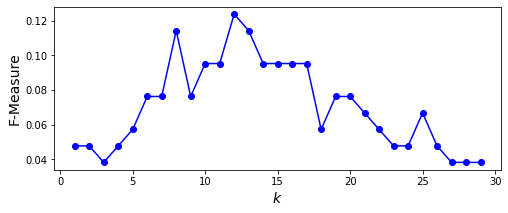

In [19]:
from sklearn.metrics import f1_score
k=30
labelList=[]
for i in range(1,k):
  centers, labels = find_clusters(tfidf_matrix, i,"manhattan")
  labelList.append(f1_score(labelSession,labels,average='micro'))                     
plt.figure(figsize=(8, 3))
plt.plot(range(1, 30), labelList, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("F-Measure", fontsize=14)
plt.show()


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

### Second evalaution 

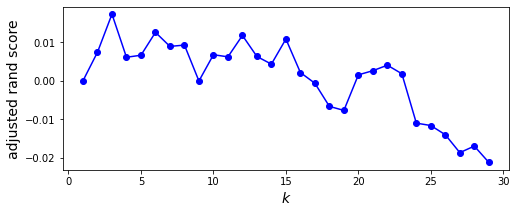

In [20]:
from sklearn import metrics
# metrics.adjusted_rand_score(labels_true, labels_pred)

k=30
labelList=[]
for i in range(1,k):
  centers, labels = find_clusters(tfidf_matrix, i,"manhattan")
  labelList.append(metrics.adjusted_rand_score(labelSession,labels))                   
plt.figure(figsize=(8, 3))
plt.plot(range(1, 30), labelList, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("adjusted rand score", fontsize=14)
plt.show()

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation



---


# 4. DBSCAN Clustering

## 4.1 Travel Review Dataset

### Train DBSCAN clustering 

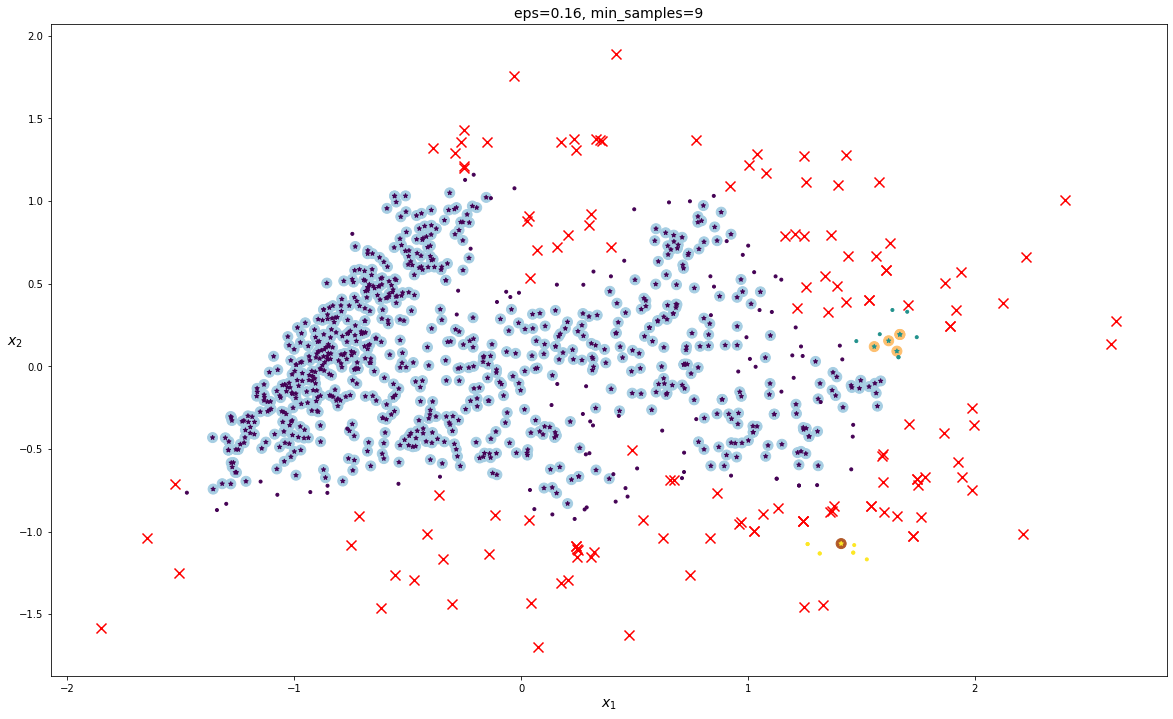

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)
# 'cosine','manhattan'euclidean
dbscan=DBSCAN(eps=0.16,min_samples=9,metric='euclidean')
dbscan.fit(X_reduced)
plt.figure(figsize=(20,12))

plot_dbscan(dbscan,X_reduced,size=100)

https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

### First evaluation

Text(0.5, 0, 'eps')

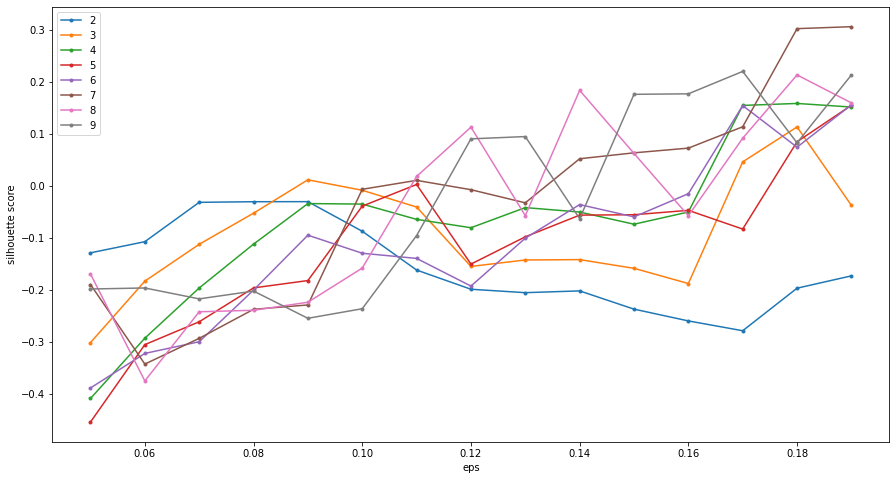

In [22]:
plt.figure(figsize=(15,8))
for min_samples in range(2,10):
  silhouette_scores=[]
  xlabel=[]
  for eps in range(5,20):
    dbscan=DBSCAN(eps=eps/100,min_samples=min_samples,metric='euclidean')
    xlabel.append(eps/100)
    silhouette_scores.append(silhouette_score(X_reduced,dbscan.fit(X_reduced).labels_))
  plt.plot(xlabel, silhouette_scores,marker='.',label=min_samples)
  plt.legend()
plt.ylabel('silhouette score')
plt.xlabel('eps')

### Second evaluation 

Text(0.5, 0, 'eps')

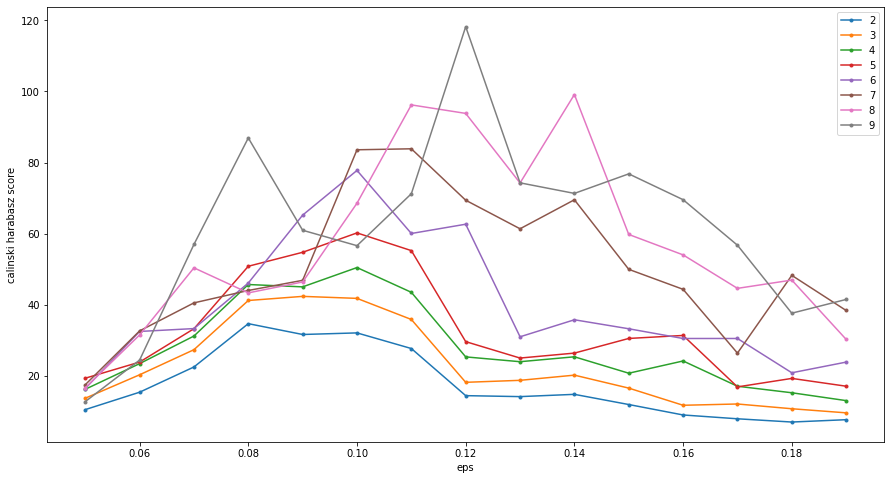

In [23]:
plt.figure(figsize=(15,8))
for min_samples in range(2,10):
  silhouette_scores=[]
  xlabel=[]
  for eps in range(5,20):
    dbscan=DBSCAN(eps=eps/100,min_samples=min_samples,metric='euclidean')
    xlabel.append(eps/100)
    silhouette_scores.append(metrics.calinski_harabasz_score(X_reduced,dbscan.fit(X_reduced).labels_))
  plt.plot(xlabel, silhouette_scores,marker='.',label=min_samples)
  plt.legend()
plt.ylabel('calinski harabasz score')
plt.xlabel('eps')

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html

## 4.2 ICMLA Dataset

### Train DBSCAN clustering 

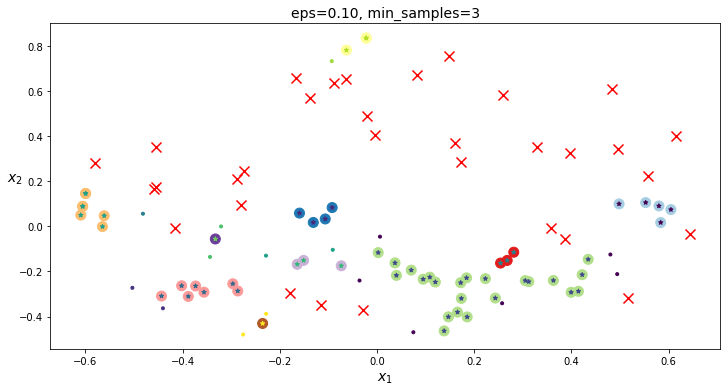

In [24]:
from sklearn.metrics import davies_bouldin_score
dbscan=DBSCAN(eps=0.1,min_samples=3,metric='manhattan')
dbscan.fit(tfidf_matrix)
plt.figure(figsize=(12,6))
plot_dbscan(dbscan,tfidf_matrix,size=100)

### First evaluation 

Text(0.5, 0, 'eps')

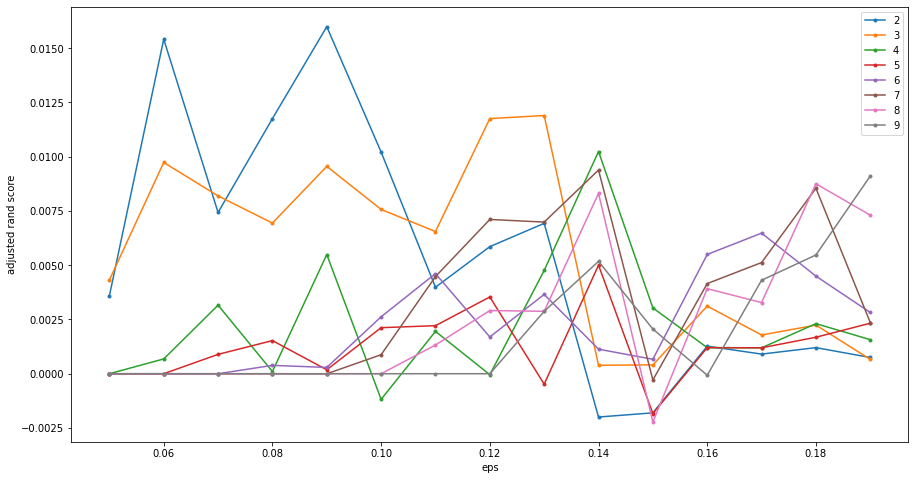

In [25]:
plt.figure(figsize=(15,8))
for min_samples in range(2,10):
  silhouette_scores=[]
  xlabel=[]
  for eps in range(5,20):
    dbscan=DBSCAN(eps=eps/100,min_samples=min_samples,metric='manhattan')
    dbscan.fit(tfidf_matrix)

    xlabel.append(eps/100)
    silhouette_scores.append(metrics.adjusted_rand_score(labelSession,dbscan.labels_))
  plt.plot(xlabel, silhouette_scores,marker='.',label=min_samples)
  plt.legend()
plt.ylabel('adjusted rand score')
plt.xlabel('eps')

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

### Second evaluation 

Text(0.5, 0, 'eps')

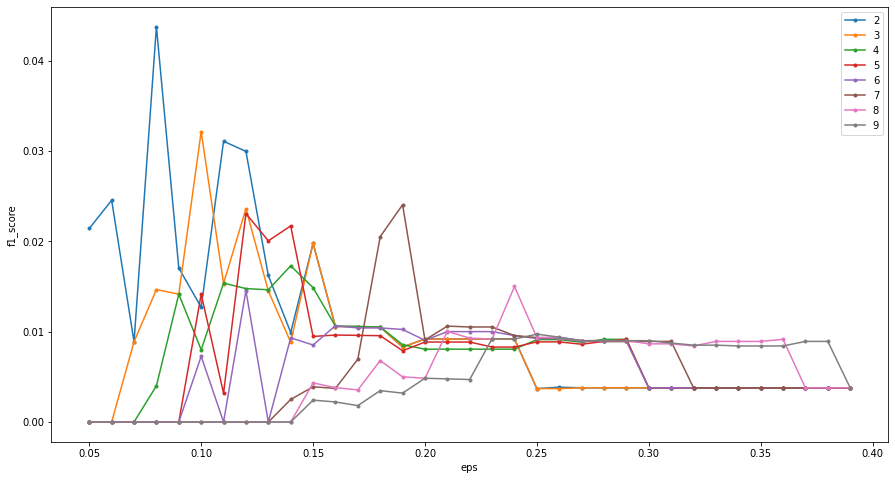

In [26]:
from sklearn.metrics import f1_score

plt.figure(figsize=(15,8))
for min_samples in range(2,10):
  silhouette_scores=[]
  xlabel=[]
  for eps in range(5,40):
    dbscan=DBSCAN(eps=eps/100,min_samples=min_samples,metric='manhattan')
    dbscan.fit(tfidf_matrix)

    xlabel.append(eps/100)
    silhouette_scores.append(f1_score(labelSession,dbscan.labels_,average='macro'))
  plt.plot(xlabel, silhouette_scores,marker='.',label=min_samples)
  plt.legend()
plt.ylabel('f1_score')
plt.xlabel('eps')

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html